### Importing Data

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [109]:
ps4_data = pd.read_excel("PS4_GamesSales.xlsx")
ps4_data

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [110]:
xbox_data = pd.read_excel("XboxOne_GameSales.xlsx")
xbox_data

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


### Cleaning Data and Manipulation

In [111]:
# remove the Pos column in Xbox data so I can concatenate the PS4 and Xbox data together

xbox_data = xbox_data.drop(columns="Pos")
xbox_data

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...
608,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


In [112]:
# adding a column to mark the data as xbox data, same or PS4; This way I can analyze the data based off game system as well

xbox_data["Console"] = "xbox"
xbox_data

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Console
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72,xbox
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37,xbox
2,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23,xbox
3,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77,xbox
4,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43,xbox
...,...,...,...,...,...,...,...,...,...,...
608,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,xbox
609,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,xbox
610,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,xbox
611,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,xbox


In [113]:
ps4_data["Console"] = "ps4"
ps4_data

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Console
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,ps4
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,ps4
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,ps4
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,ps4
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,ps4
...,...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00,ps4
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00,ps4
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00,ps4
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00,ps4


In [114]:
all_data = ps4_data.append(xbox_data)
all_data

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Console
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,ps4
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,ps4
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,ps4
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,ps4
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,ps4
...,...,...,...,...,...,...,...,...,...,...
608,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,xbox
609,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,xbox
610,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,xbox
611,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,xbox


In [115]:
# change the data type of year to datetime
all_data["Year"] = pd.to_datetime(all_data["Year"])

In [116]:
# make sure the columns with numbers are numeric data types and not string
all_data[["North America", "Japan", "Europe", "Rest of World", "Global"]] = all_data[["North America", "Japan", "Europe", "Rest of World", "Global"]].apply(pd.to_numeric)

In [117]:
# changes the column name Global to Total Sales so it not confusing
all_data["Total_Sales"] = all_data["Global"]
all_data = all_data.drop(columns="Global")

In [118]:
#checking for nan values, to see what I can do to them
nan_data = all_data[all_data.isnull().any(axis=1)]
len(nan_data)

317

In [119]:
# checking to see the percentage of the data is nan compared to entire data set, to see if i should drop the data or fill it in
print(str((317/1647)*100)+" %")

19.247115968427444 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBFFBC3D08>,
      dtype=object)

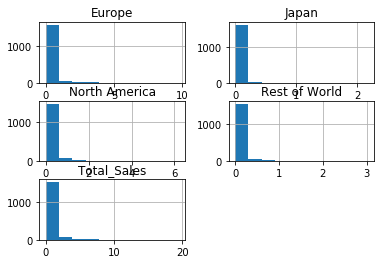

In [120]:
all_data.hist()

In [121]:
# the data is very skewed so i will use non parametric statistical tests

In [122]:
# I decicded to drop all the nan rows because the amount of data missing is actually quite small and insignificant 
all_data.dropna

<bound method DataFrame.dropna of                           Game                          Year  \
0           Grand Theft Auto V 1970-01-01 00:00:00.000002014   
1    Call of Duty: Black Ops 3 1970-01-01 00:00:00.000002015   
2        Red Dead Redemption 2 1970-01-01 00:00:00.000002018   
3           Call of Duty: WWII 1970-01-01 00:00:00.000002017   
4                      FIFA 18 1970-01-01 00:00:00.000002017   
..                         ...                           ...   
608                  Biomutant 1970-01-01 00:00:00.000002018   
609                  Biomutant 1970-01-01 00:00:00.000002019   
610                    de Blob 1970-01-01 00:00:00.000002017   
611    Outcast: Second Contact 1970-01-01 00:00:00.000002017   
612                  Code Vein 1970-01-01 00:00:00.000002019   

                Genre                   Publisher  North America  Europe  \
0              Action              Rockstar Games           6.06    9.71   
1             Shooter                  Activi

### Statistical Analysis

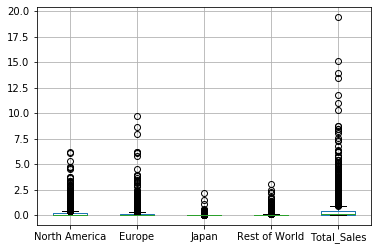

In [123]:
# find outliers, wary that the total sales is just effected by the other columns

all_data.boxplot()

In [124]:
all_data["Europe"].mean()

0.20544019429265273

In [125]:
all_data[all_data["Europe"] > 7.5]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Console,Total_Sales
0,Grand Theft Auto V,1970-01-01 00:00:00.000002014,Action,Rockstar Games,6.06,9.71,0.60,3.02,ps4,19.39
4,FIFA 18,1970-01-01 00:00:00.000002017,Sports,EA Sports,1.27,8.64,0.15,1.73,ps4,11.80
5,FIFA 17,1970-01-01 00:00:00.000002016,Sports,Electronic Arts,1.26,7.95,0.12,1.61,ps4,10.94


In [126]:
# after doing extra research about the outliers, i decided to let them stay because they are valid for analysis

In [127]:
numeric_data = all_data[["North America", "Japan", "Europe", "Rest of World", "Total_Sales"]]

In [128]:
# i will use vif to find any features that are too correlated, so I can reduce the noise
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_data.columns

vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]

print(vif_data)

         Feature            VIF
0  North America   17815.809230
1          Japan     376.086049
2         Europe   22092.930026
3  Rest of World    2236.691503
4    Total_Sales  102923.507108


In [129]:
# none of the numeric features have too much correlation, so I can keep them all

In [130]:
# performing anova to see if the means have a huge significance and see where the majority of the influence come from
stats.kruskal(all_data["North America"], all_data["Japan"], all_data["Europe"], all_data["Rest of World"])

KruskalResult(statistic=527.6406926109348, pvalue=4.877635562385983e-114)

In [131]:
# the p-value tells me there is a significance between the means

In [132]:
numeric_data.describe()

,North America,Japan,Europe,Rest of World,Total_Sales
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000
mean,0.227322,0.021427,0.205440,0.070753,0.524997
std,0.575961,0.087321,0.657405,0.206324,1.391939
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.040000,0.000000,0.000000,0.010000,0.060000
75%,0.150000,0.010000,0.115000,0.040000,0.360000
max,6.180000,2.170000,9.710000,3.020000,19.390000


In [133]:
categorical_data = all_data[["Game", "Genre", "Publisher", "Console"]]

In [134]:
categorical_data.describe()

,Game,Genre,Publisher,Console
count,1647,1647,1330,1647
unique,1127,17,162,2
top,Biomutant,Action,Ubisoft,ps4
freq,4,405,90,1034


In [135]:
# i see that publisher has lower count than the other features, need to investigate

In [136]:
all_data[all_data["Publisher"].isnull() == True]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Console,Total_Sales
447,Ultra Street Fighter IV,NaT,Fighting,NaN,0.0,0.08,0.00,0.01,ps4,0.10
466,Dragon's Dogma Online,NaT,Role-Playing,NaN,0.0,0.00,0.09,0.00,ps4,0.09
630,This War of Mine,NaT,Action,NaN,0.0,0.02,0.00,0.00,ps4,0.03
724,A Boy and His Blob,NaT,Platform,NaN,0.0,0.00,0.00,0.00,ps4,0.00
727,Another World,NaT,Adventure,NaN,0.0,0.00,0.00,0.00,ps4,0.00
...,...,...,...,...,...,...,...,...,...,...
595,De-formers,NaT,Action,NaN,0.0,0.00,0.00,0.00,xbox,0.00
596,Wonder Boy: The Dragon's Trap (Remake),NaT,Platform,NaN,0.0,0.00,0.00,0.00,xbox,0.00
597,Rock of Ages II: Bigger and Boulder,NaT,Action,NaN,0.0,0.00,0.00,0.00,xbox,0.00
598,Fe,NaT,Action,NaN,0.0,0.00,0.00,0.00,xbox,0.00


In [137]:
# i am noticing that majority of these data have no numeric data either, so I will drop these rows

all_data = all_data[all_data["Publisher"].isnull() == False]

In [140]:
categorical_data = all_data[["Game", "Genre", "Publisher", "Console"]]
categorical_data.describe()

,Game,Genre,Publisher,Console
count,1330,1330,1330,1330
unique,879,17,162,2
top,Biomutant,Action,Ubisoft,ps4
freq,4,322,90,825


### Data Analysis / Answering Questions

### Question 1: Which Console makes more money, X-box or the PS4?

### Question 2: Which Publisher makes the most money?

### Question 3: Which game Genre has the most sales overall?

### Question 4: Removing any outlier, now which Genre has the most sales overall?

### Quesiton 5: Overtime, is there an increase or decrease in overall game sales?